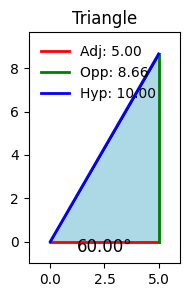

In [7]:

from pathlib import Path
from tkinter import Tk, Canvas, Entry, Text, Button, PhotoImage, Label
from tkinter.ttk import Combobox  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

OUTPUT_PATH = Path().resolve()
ASSETS_PATH = OUTPUT_PATH /"frame0"

def relative_to_assets(path: str) -> Path:
    return ASSETS_PATH / Path(path)

def calculate_and_plot():
    try:
        # Get input values, default to 0 if not provided
        degree_input = entry_1.get()  
        hyp_input = entry_4.get()     

        # Convert inputs to float or default to 0
        degree = float(degree_input) if degree_input else 0
        hyp = float(hyp_input) if hyp_input else 0

        result_text = ""
        given_values = []
        if degree_input:
            given_values.append(f"Degree: {degree:.2f}°")
        if hyp_input:
            given_values.append(f"Hypotenuse: {hyp:.2f}")

        if degree != 0 and hyp != 0:
            # Calculate adjacent and opposite sides
            adj = hyp * np.cos(np.radians(degree))
            opp = hyp * np.sin(np.radians(degree))

            result_text += (
                f"Calculated Adjacent: {adj:.2f}\n"
                f"Solution: adj = hyp * cos(angle)\n"
                f"adj = {hyp:.2f} * cos({degree:.2f}°)\n"
                f"adj = {adj:.2f}\n\n"
            )

            result_text += (
                f"Calculated Opposite: {opp:.2f}\n"
                f"Solution: opp = hyp * sin(angle)\n"
                f"opp = {hyp:.2f} * sin({degree:.2f}°)\n"
                f"opp = {opp:.2f}\n\n"
            )

            # Check validity using Pythagorean theorem 
            #This is assuming that it is a right triangle
            adj_squared = adj ** 2
            opp_squared = opp ** 2
            hyp_squared = hyp ** 2
            result_text += (
                f"Validation (Pythagorean Theorem):\n"
                f"adj^2 + opp^2 = {adj_squared:.2f} + {opp_squared:.2f} = {adj_squared + opp_squared:.2f}\n"
                f"hyp^2 = {hyp_squared:.2f}\n"
            )

            if np.isclose(adj_squared + opp_squared, hyp_squared, atol=0.01):
                result_text += "The sides are valid (Pythagorean theorem is satisfied).\n\n"
            else:
                result_text += "The sides are invalid (Pythagorean theorem is not satisfied).\n\n"

        result_text = (
            f"Given Values:\n" +
            "\n".join(given_values) +
            "\n\n" + result_text
        )

        # Update the solution box with calculations
        canvas.itemconfig(result_label, text=result_text)
        canvas.itemconfig(result_label, font=("Murecho SemiBold", 8))  # Smaller font size for result

        # Plot the triangle 
        if adj != 0 and opp != 0 and hyp != 0:
            plot_triangle(adj, opp, hyp, degree)
        else:
            canvas.itemconfig(result_label, text="Unable to plot: insufficient data.")
            
    except ValueError:
        canvas.itemconfig(result_label, text="Please enter valid numbers for the sides.")


# Function to plot the triangle
def plot_triangle(adj, opp, hyp, degree, max_height=10, min_height=-1):
    # Remove the placeholders or previous plot
    canvas.delete("default_image")  

    fig, ax = plt.subplots(figsize=(3, 3))  
    fig.patch.set_visible(False)
    ax.set_facecolor('none') 

    # Define the triangle's vertices
    vertices = [(0, 0), (adj, 0), (adj, opp)]  
    triangle = plt.Polygon(vertices, closed=True, edgecolor='black', facecolor='lightblue')
    ax.add_patch(triangle)

    # Plot each side with a different color and label them
    ax.plot([0, adj], [0, 0], color='red', linewidth=2, label=f'Adj: {adj:.2f}')  # Adjacent side
    ax.plot([adj, adj], [0, opp], color='green', linewidth=2, label=f'Opp: {opp:.2f}')  # Opposite side
    ax.plot([0, adj], [0, opp], color='blue', linewidth=2, label=f'Hyp: {hyp:.2f}')  # Hypotenuse

    # Label the angle
    ax.text(adj / 2, -0.5, f'{degree:.2f}°', fontsize=12, ha='center', color='black')

    # Dynamically adjust the y-axis based on the triangle's height (opp)
    ax.set_xlim(-1, adj + 1)
    ax.set_ylim(min(0, -1), opp + 1) 
    ax.set_aspect('equal', 'box')
    ax.set_title('Triangle')

    # Display the legend with the plot labels
    ax.legend(loc='upper left', fontsize=10, frameon=False)

    # Display the plot on the Tkinter window
    canvas_plot = FigureCanvasTkAgg(fig, window)
    canvas_plot.get_tk_widget().place(x=30.0, y=120.0)  # Place the graph at the specified coordinates
    canvas_plot.draw()



window = Tk()

window.geometry("700x550")
window.configure(bg = "#FFE873")
window.title("Topic 1: Trigonometry")


canvas = Canvas(
    window,
    bg = "#FFE873",
    height = 550,
    width = 700,
    bd = 0,
    highlightthickness = 0,
    relief = "ridge"
)

canvas.place(x = 0, y = 0)
canvas.create_rectangle(
    0.0,
    0.0,
    700.0,
    94.0,
    fill="#306998",
    outline="")

canvas.create_text(
    17.0,
    12.0,
    anchor="nw",
    text="Graphing Tool for \nBasic Trigonometric Functions",
    fill="#FFFFFF",
    font=("Murecho SemiBold", 32 * -1)
)

canvas.create_rectangle(
    0.0,
    523.0,
    700.0,
    550.0,
    fill="#306998",
    outline="")


canvas.create_text(
    349.0,
    110.0,
    anchor="nw",
    text="Solution",
    fill="#000000",
    font=("Murecho SemiBold", 20 * -1)
)

image_image_1 = PhotoImage(file=relative_to_assets("image_1.png"))
window.image_image_1 = image_image_1 
image_1 = canvas.create_image(
    175.0,
    283.0,
    image=image_image_1,
    tags="default_image"
)

image_image_2 = PhotoImage(file=relative_to_assets("image_2.png"))
window.image_image_2 = image_image_2  
image_2 = canvas.create_image(
    520.0,
    283.0,
    image=image_image_2
)

canvas.create_text(
    35.0,
    110.0,
    anchor="nw",
    text="Graph",
    fill="#000000",
    font=("Murecho SemiBold", 20 * -1),
    tags="default_image"
)

canvas.create_text(
    35.0,
    431.0,
    anchor="nw",
    text="Enter Degrees",
    fill="#306998",
    font=("Murecho SemiBold", 16 * -1)
)

canvas.create_text(
    316.0,
    431.0,
    anchor="nw",
    text="Enter Length of Ladder",
    fill="#306998",
    font=("Murecho SemiBold", 16 * -1)
)

image_image_3 = PhotoImage(
    file=relative_to_assets("image_3.png"))
image_3 = canvas.create_image(
    659.9999967736619,
    43.0,
    image=image_image_3
)

entry_image_1 = PhotoImage(
    file=relative_to_assets("entry_1.png"))
entry_bg_1 = canvas.create_image(
    107.0,
    480.0,
    image=entry_image_1
)
entry_1 = Entry(
    bd=0,
    bg="#EDEDED",
    fg="#000716",
    highlightthickness=0
)
entry_1.place(
    x=59.0,
    y=465.0,
    width=196.0,
    height=28.0
)




entry_image_4 = PhotoImage(
    file=relative_to_assets("entry_4.png"))
entry_bg_4 = canvas.create_image(
    500.0,
    480.0,
    image=entry_image_4
)
entry_4 = Entry(
    bd=0,
    bg="#EDEDED",
    fg="#000716",
    highlightthickness=0
)
entry_4.place(
    x=300.0,
    y=465.0,
    width=196.0,
    height=28.0
)

button_image_1 = PhotoImage(file=relative_to_assets("button_1.png"))
button_1 = Button(
    image=button_image_1,
    borderwidth=0,
    highlightthickness=0,
    command=calculate_and_plot,  # Call the plot function when the button is clicked
    relief="flat"
)
button_1.place(
    x=589.0,
    y=450.0,
    width=83.0,
    height=50.0
)


result_label = canvas.create_text(520, 290, text="", fill="black", font=("Arial", 12))

window.resizable(False, False)
window.mainloop()
